**Giriş**

Titanik'in batması tarihteki en büyük gemi facialarından biridir.

15 Nisan 1912'de, ilk yolculuğu sırasında, yaygın olarak "batmaz" olarak kabul edilen Titanic, bir buzdağına çarptıktan sonra batmıştır. Ne yazık ki gemideki herkese yetecek kadar cankurtaran filikası olmadığı için facia, 2224 yolcu ve mürettebattan 1502'sinin ölümüyle sonuçlanmıştır.

Proje kapsamında kayıtlı Titanik yolcu bilgileri ile bir analiz gerçekleştirilecektir.

**İçerik**

*  Gerekli kütüphanelerin indirilmesi
*  Veri setinin yüklenmesi ve incelenmesi
*  Kategorik, Sayısal ve Kardinal Verilerin Belirlenmesi
*  Değişkenlerin Görselleştirilmesi
*  Korelasyon Analizi (Değişkenler Arası İlişkiler)
*  Aykırı Değerlerin Belirlenmesi
*  Eksik Değer Analizi
*  One Hot Encoding


**Gerekli kütüphanelerin indirilmesi**

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

**Veri setinin yüklenmesi ve incelenmesi**

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("\n##################### Columns #####################")
    print(dataframe.columns)
    print("\n##################### Info #####################")
    dataframe.info()
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head())
    print("##################### Tail #####################")
    print(dataframe.tail())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

Veri Seti


*  Passenger ID - Yolcu kimlikleri
*  Survived  - Hayatta kaldılar mı, yaşamadılar mı (0 = Ölü 1 = Hayatta)
*  P Class - Yolcuların seyahat ettiği sınıf
*  Name - Yolcu Adı
*  Sex  - Yolcunun Cinsiyeti
*  Age - Yolcunun yaşı
*  SibSp - Kardeş veya eş sayısı
*  Parch - Ebeveyn veya çocuk
*  Ticket - Bilet numarası
*  Fare - Bilet için ödenen tutar
*  Cabin - Rezidans kabini
*  Embarked - Biniş noktası (C = Cherbourg; Q = Queenstown; S = Southampton)














In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Veri seti 12 sütun 891 satırdan oluşmaktadır.

In [6]:
df.shape

(891, 12)

Nümerik değişkenlere ait ortalama,standart sapma, min, max değerleri tablodaki gibidir.

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


Her değişkene ait kaç adet farklı değer olduğu aşağıda görülmektedir.

In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Kategorik, Sayısal ve Kardinal Verilerin Belirlenmesi**

In [10]:
def column_detection(dataframe: pd.DataFrame, cat_th: int = 10, car_th: int = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("\n##################### Categoric #####################")
    print(cat_cols)
    print("\n##################### Numeric #####################")
    print(num_cols)
    print("\n##################### Categoric But Cardinal #####################")
    print(cat_but_car)
    print("\n##################### Numeric But Categoric #####################")
    print(num_but_cat)
    print("\n##################### Columns Overview #####################")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

Sex,embarked,survived,pclass,sibSp ve parch değişkenleri kategorik değişkenlerdir.
PassengerId,Age ve Fare değişkenleri nümeriktir.
Name,ticket ve cabin değişkenleri kategorik veri gibi gözükse de kardinaldir.
Survived,Pclass,SibSp ve Parch değişkenleri ise nümerik gibi gözükse de kategorik değişkenlerdir.

In [11]:
cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(df)


##################### Categoric #####################
['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

##################### Numeric #####################
['PassengerId', 'Age', 'Fare']

##################### Categoric But Cardinal #####################
['Name', 'Ticket', 'Cabin']

##################### Numeric But Categoric #####################
['Survived', 'Pclass', 'SibSp', 'Parch']

##################### Columns Overview #####################
Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


**Değişkenlerin Görselleştirilmesi**

Tüm değişkenlerin yüzdelik dilimleri ve değişkenlerin sayısal değerlerine göre grafikleri değerlendirilmiştir.

        Sex  Ratio
Sex               
male    577 64.759
female  314 35.241


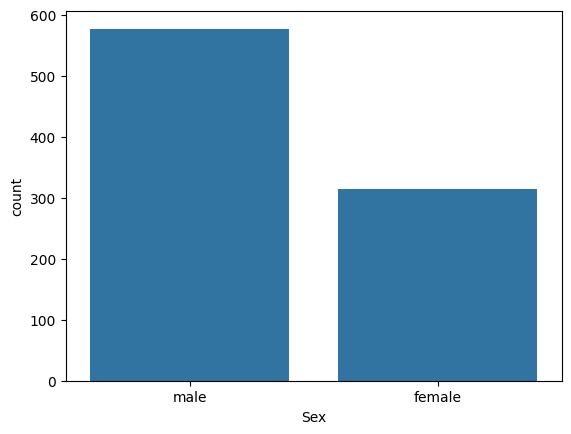

          Embarked  Ratio
Embarked                 
S              644 72.278
C              168 18.855
Q               77  8.642


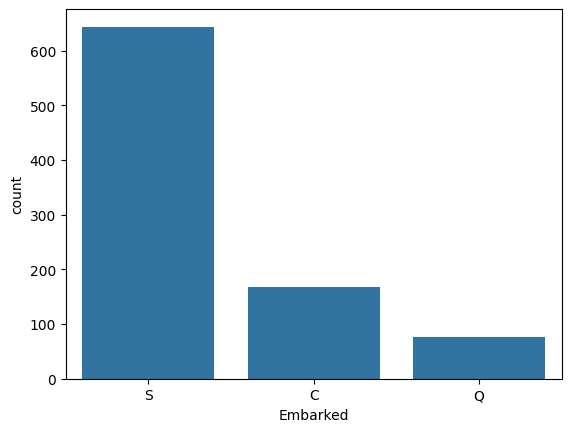

          Survived  Ratio
Survived                 
0              549 61.616
1              342 38.384


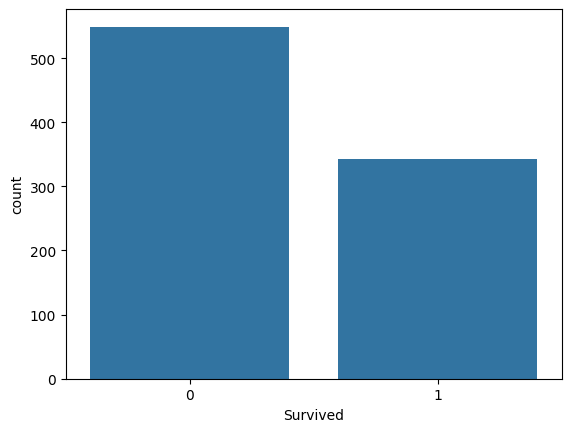

        Pclass  Ratio
Pclass               
3          491 55.107
1          216 24.242
2          184 20.651


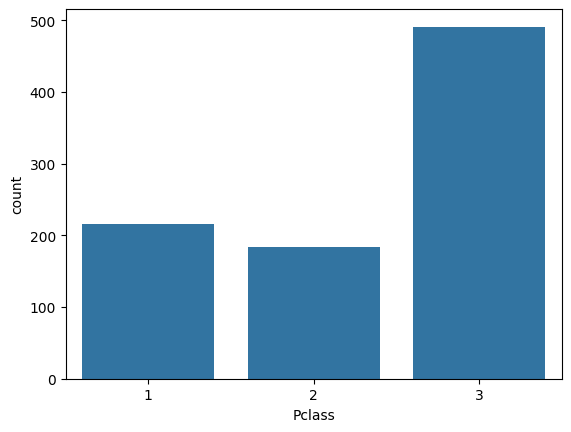

       SibSp  Ratio
SibSp              
0        608 68.238
1        209 23.457
2         28  3.143
4         18  2.020
3         16  1.796
8          7  0.786
5          5  0.561


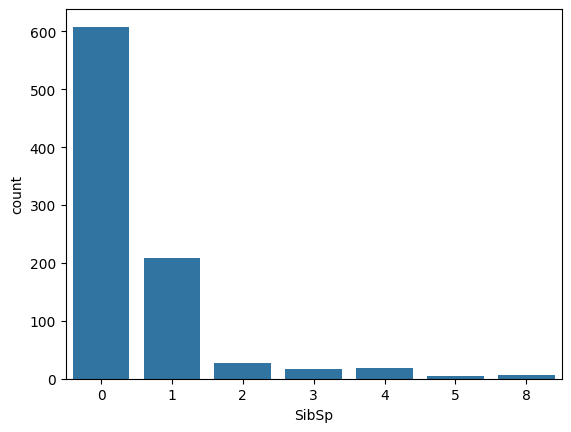

       Parch  Ratio
Parch              
0        678 76.094
1        118 13.244
2         80  8.979
5          5  0.561
3          5  0.561
4          4  0.449
6          1  0.112


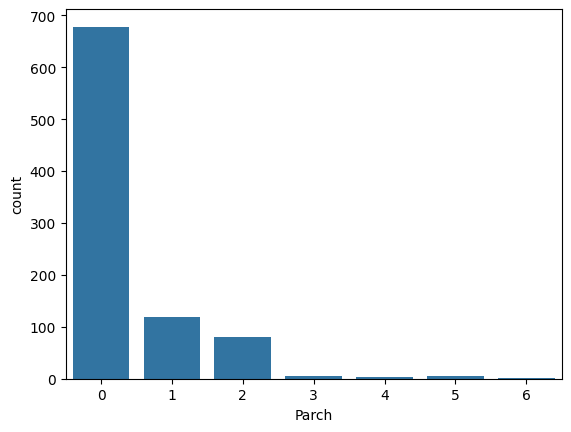

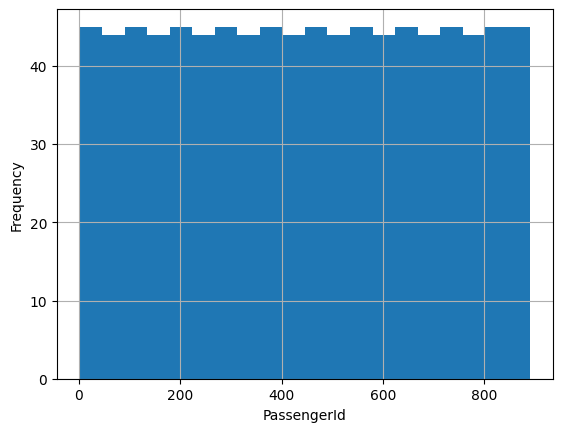

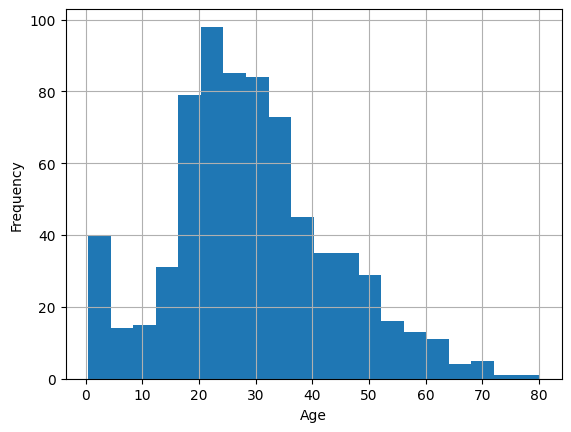

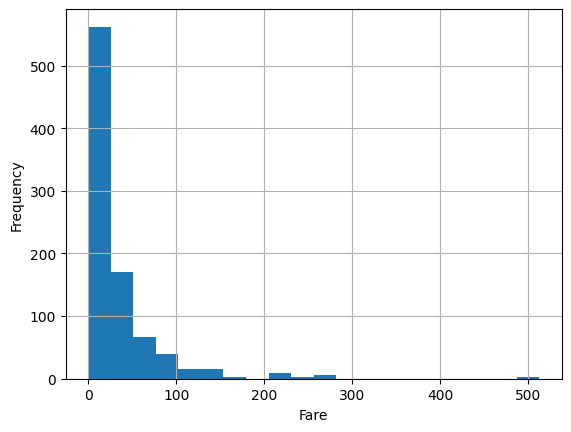

In [12]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


for col in cat_cols:
    cat_summary(df, col)


def hist_num_columns_show(dataframe, num_column):
    dataframe[num_column].hist(bins=20)
    plt.xlabel(num_column)
    plt.ylabel("Frequency")
    plt.show(block=True)


for num_col in num_cols:
    hist_num_columns_show(df, num_col)

Yolcuların yaşlarına göre ödedikleri ücretleri gösteren bir dağılım grafiği değerlendirilmiştir. Bu analiz, farklı değişkenler için de incelenebilir.

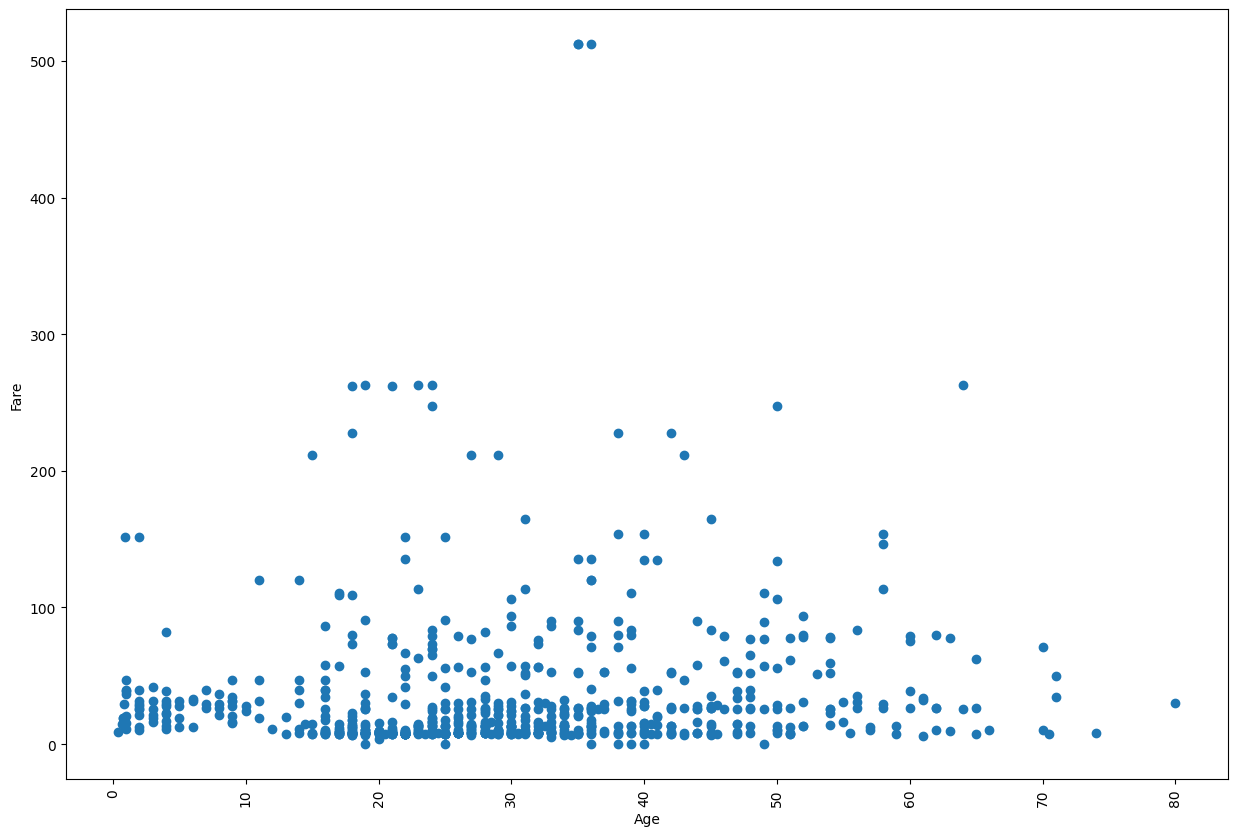

In [13]:
plt.figure(figsize=(15,10))
plt.scatter('Age',"Fare" , data=df)
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

Yolcu yaşlarına göre ücret grafiği çubuk grafiği ile de değerlendirilmiştir. Grafiğin çeşidi ya da hangi değişkenler arasında inceleneceği ihtiyaca göre değerlendirilebilir.

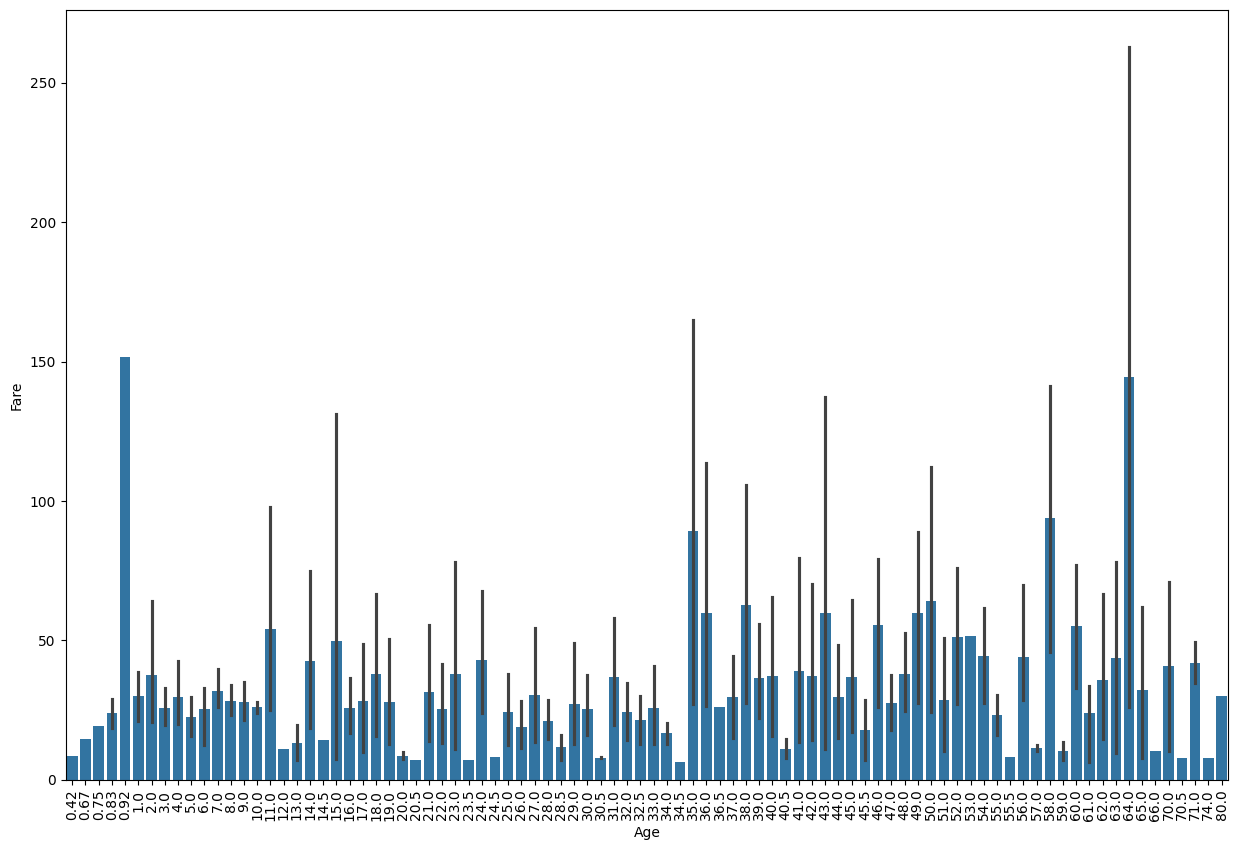

In [14]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="Age", y="Fare", data=df)
plt.xticks(rotation= 90);

**Korelasyon Analizi (Değişkenler Arasındaki İlişkiler)**

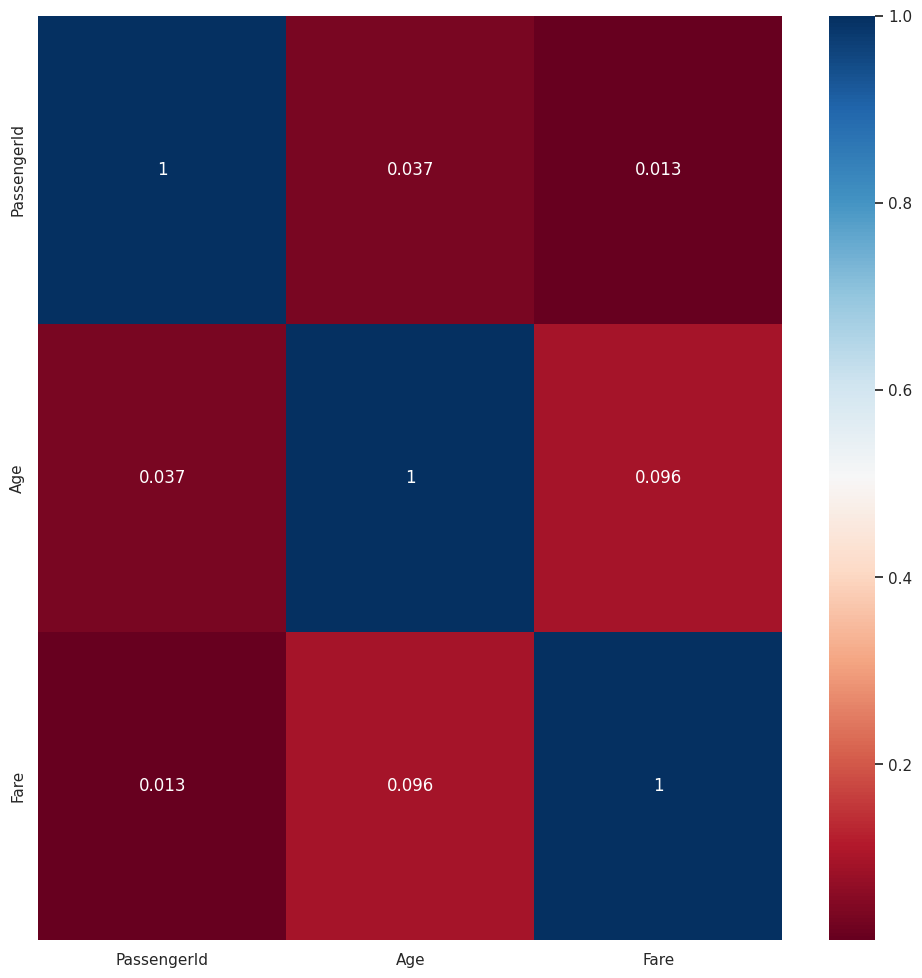

In [15]:
corr = df[num_cols].corr()

# Korelasyon haritasını oluşturalım
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu", annot=True)  # annot=True ile korelasyon değerlerini göster
plt.show()

**Aykırı Değerlerin Belirlenmesi**

Yaş değişkeninin aykırı değer analizi gerçekleştirilmiş ve boxplot ile görselleştirilmiştir. Veri setinin yaş aralığı 20-40 arasında değişkenlik göstermektedir.

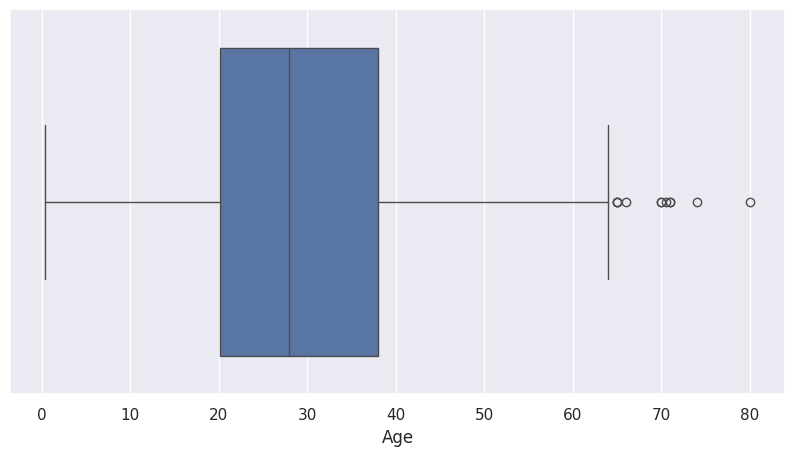

In [17]:

plt.figure(figsize=(10,5))
sns.boxplot(x=df["Age"])
plt.show(block=True)

In [18]:
# Herhangi bir sütundaki verinin outlier olması için alt ve üst limiti
def outlier_thresholds(dataframe: pd.DataFrame, col_name: str, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [19]:
outlier_thresholds(df,"Age")

(-6.6875, 64.8125)

In [21]:
def check_outlier(dataframe: pd.DataFrame, col_name: str):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(
            axis=None):
        return True
    else:
        return False

In [22]:
check_outlier(df,"Age")

True

 **Eksik Değer Analizi**

Yaş değişkeninde 177, cabin değişkeninde 687 ve embarked değişkeninde 2 tane eksik veri vardır. Eksik değişkenler heatmap ile görselleştirilmiştir.

In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

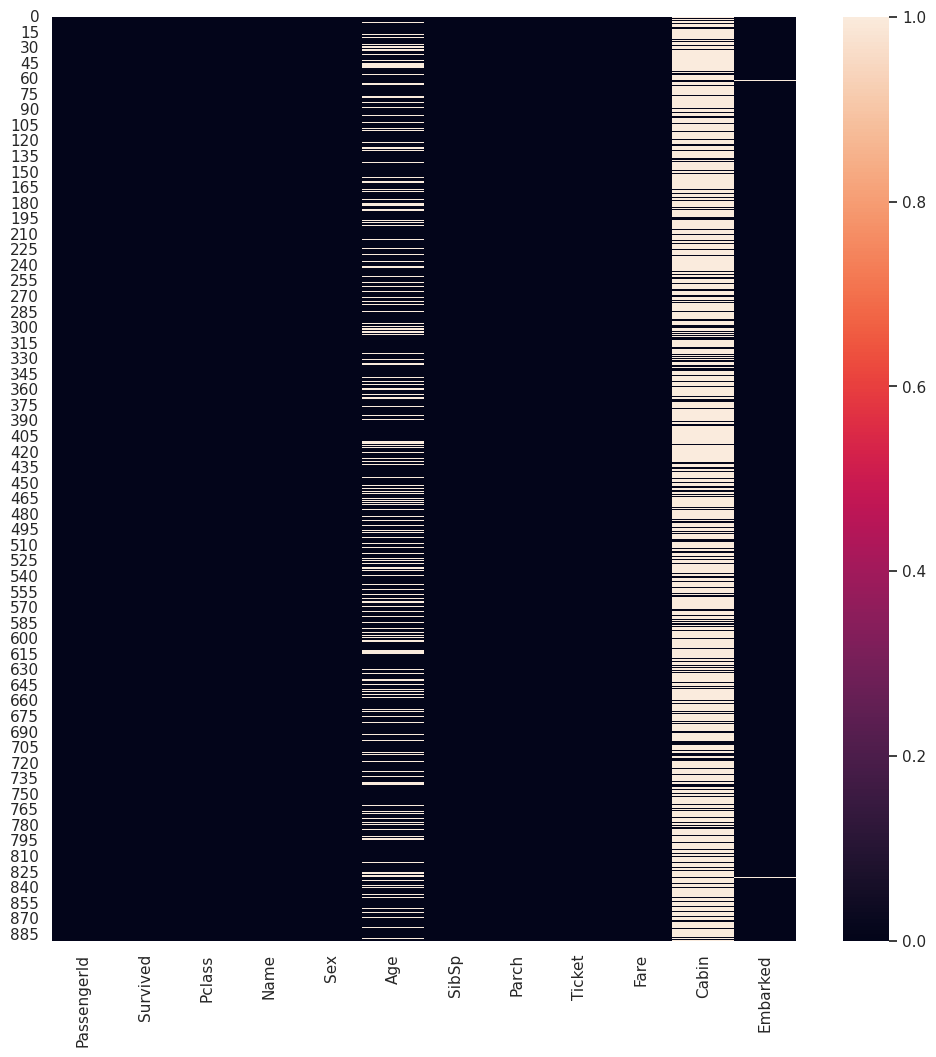

In [24]:
sns.heatmap(df.isnull())

Eksik değerleri olan 3 değişken(Age,Cabin,Embarked) veri setinden kaldırılmıştır. Ancak değişken silmek her durumda tercih edilemeyebilir!

In [25]:
df_clean=df.drop(["Age","Cabin","Embarked"],axis=1)

In [26]:
df_clean.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.250
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.283
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.925
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.100
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.050
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.458
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.862
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.075
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.133
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.071


In [27]:
df_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [28]:
df_clean.shape

(891, 9)

**One Hot Encoding**

Sex ve Embarked değişkenlerine One Hot Encoding dönüşümü uygulanmıştır.

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform\
                    (df['Sex'])

df['Embarked'] = le.fit_transform\
                    (df['Embarked'])

In [30]:
df_clean=df

In [31]:
df_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000,1,0,A/5 21171,7.250,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000,1,0,PC 17599,71.283,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000,0,0,STON/O2. 3101282,7.925,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000,1,0,113803,53.100,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000,0,0,373450,8.050,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000,0,0,211536,13.000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000,0,0,112053,30.000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.450,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000,0,0,111369,30.000,C148,0
